In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #To supress warnings
import glob 
import gc
import os
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential    # import Sequential from tensorflow.keras
from tensorflow.keras.layers import Dense, LSTM  # import Dense from tensorflow.keras.layers
from numpy.random import seed     # seed helps you to fix the randomness in the neural network.  
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter
from sklearn.decomposition import PCA
import xgboost as xgb
import pickle

In [ ]:
train = pd.read_csv('training_sample.csv')
train.head()

FileNotFoundError: ignored

In [ ]:
train.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,...,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,...,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,...,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


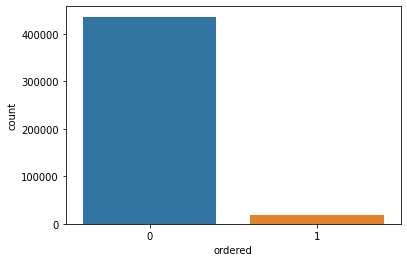

In [ ]:
ax = sns.countplot(data=train,x="ordered")
plt.show()

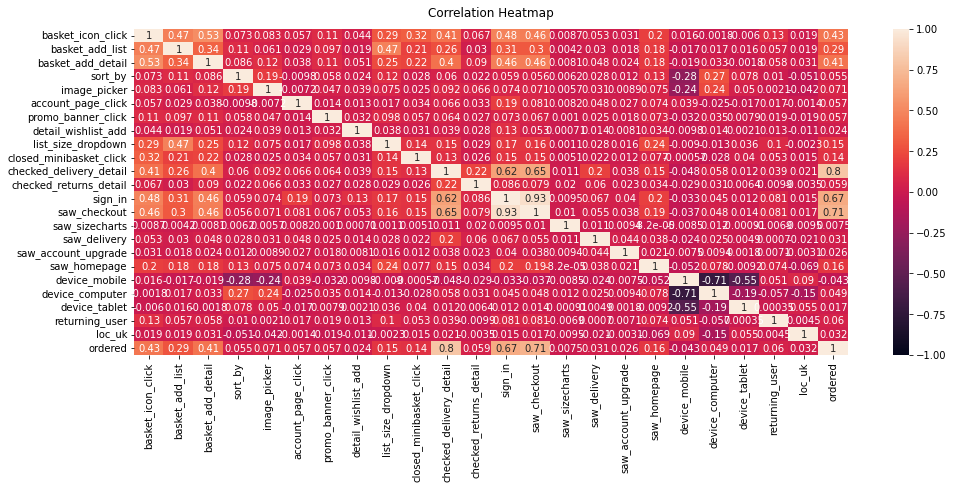

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
X = train.drop(columns = ['ordered', 'UserID'])
y = train['ordered']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364320 entries, 151428 to 121958
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   basket_icon_click        364320 non-null  int64
 1   basket_add_list          364320 non-null  int64
 2   basket_add_detail        364320 non-null  int64
 3   sort_by                  364320 non-null  int64
 4   image_picker             364320 non-null  int64
 5   account_page_click       364320 non-null  int64
 6   promo_banner_click       364320 non-null  int64
 7   detail_wishlist_add      364320 non-null  int64
 8   list_size_dropdown       364320 non-null  int64
 9   closed_minibasket_click  364320 non-null  int64
 10  checked_delivery_detail  364320 non-null  int64
 11  checked_returns_detail   364320 non-null  int64
 12  sign_in                  364320 non-null  int64
 13  saw_checkout             364320 non-null  int64
 14  saw_sizecharts           364320

In [ ]:
#full_pipeline = ColumnTransformer([
#        ("cat_encoder", OneHotEncoder(), list(X_train.columns))
#    ])

#X_train_tr = full_pipeline.fit_transform(X_train)
#X_val_tr = full_pipeline.fit_transform(X_val)

In [ ]:
sm = SMOTE(k_neighbors=10, n_jobs = -1)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
lg_reg = LogisticRegression()
lg_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
lg_score = cross_val_score(lg_reg, X_train, y_train,
                             scoring="accuracy", cv=10)
display_scores(lg_score)

Scores: [0.99181984 0.9919631  0.9916909  0.99141871 0.99187714 0.99143303
 0.99197731 0.99223518 0.99171943 0.99156185]
Mean: 0.9917696481437304
Standard deviation: 0.00024488990460143427


In [ ]:
lgb = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.001, n_jobs=-1)
lgb.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.001)

In [ ]:
lgm_score = cross_val_score(lgb, X_train, y_train,
                             scoring="accuracy", cv=10)
display_scores(lgm_score)

Scores: [0.99237855 0.99239288 0.99233557 0.99193444 0.99220664 0.99199175
 0.9927366  0.99253603 0.99200596 0.99232114]
Mean: 0.9922839557035156
Standard deviation: 0.00024167929077722157


In [ ]:
fit_params={"early_stopping_rounds":10,
            "eval_metric" : 'accuracy', 
            "eval_set" : [(X_val, y_val)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            }

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 42)

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from skopt.space import Real, Categorical, Integer

# Setting the search space
search_spaces = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),     # Boosting learning rate
    'n_estimators': Integer(30, 5000),                   # Number of boosted trees to fit
    'num_leaves': Integer(2, 512),                       # Maximum tree leaves for base learners
    'max_depth': Integer(-1, 256),                       # Maximum tree depth for base learners, <=0 means no limit
    'subsample': Real(0.01, 1.0, 'uniform'),             # Subsample ratio of the training instance
    'subsample_freq': Integer(1, 10),                    # Frequency of subsample, <=0 means no enable
    'colsample_bytree': Real(0.01, 1.0, 'uniform'),      # Subsample ratio of columns when constructing each tree
    'reg_lambda': Real(1e-9, 100.0, 'log-uniform'),      # L2 regularization
    'reg_alpha': Real(1e-9, 100.0, 'log-uniform'),       # L1 regularization
   }

In [ ]:
from skopt import BayesSearchCV

# Wrapping everything up into the Bayesian optimizer
opt = BayesSearchCV(estimator=lgb,                                    
                    search_spaces=search_spaces,                      
                    scoring='accuracy',                           
                    cv=cv,                                           
                    n_iter=10,                                        # max number of trials
                    n_points=3,                                       # number of hyperparameter sets evaluated at the same time
                    n_jobs=-1,                                        # number of jobs
                    iid=False,                                        # if not iid it optimizes on the cv score
                    return_train_score=False,                         
                    refit=True,                                      
                    optimizer_kwargs={'base_estimator': 'GP'},        # optmizer parameters: we use Gaussian Process (GP)
                    random_state=42)                                   # random state for replicability

In [ ]:
from scipy.stats.morestats import optimize
best_clf = opt.fit(X_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(best_clf.best_score_, best_clf.best_params_))

[1]	valid's binary_logloss: 0.475939
Training until validation scores don't improve for 10 rounds.
[2]	valid's binary_logloss: 0.345542
[3]	valid's binary_logloss: 0.259157
[4]	valid's binary_logloss: 0.199083
[5]	valid's binary_logloss: 0.156092
[6]	valid's binary_logloss: 0.124849
[7]	valid's binary_logloss: 0.101872
[8]	valid's binary_logloss: 0.0848831
[9]	valid's binary_logloss: 0.0723414
[10]	valid's binary_logloss: 0.0640092
[11]	valid's binary_logloss: 0.0568022
[12]	valid's binary_logloss: 0.0515209
[13]	valid's binary_logloss: 0.0476572
[14]	valid's binary_logloss: 0.0448594
[15]	valid's binary_logloss: 0.0428624
[16]	valid's binary_logloss: 0.041502
[17]	valid's binary_logloss: 0.0405366
[18]	valid's binary_logloss: 0.0398867
[19]	valid's binary_logloss: 0.039429
[20]	valid's binary_logloss: 0.0391911
[21]	valid's binary_logloss: 0.0389371
[22]	valid's binary_logloss: 0.0388223
[23]	valid's binary_logloss: 0.0388215
[24]	valid's binary_logloss: 0.0387433
[25]	valid's binary_

In [ ]:
best_model = best_clf.best_estimator_

In [ ]:
prediction_prob = best_model.predict_proba(X_val)[:,1]
prediction1 = best_model.predict(X_val)
y_val_arri = y_val.to_numpy()
#prediction1 = np.amax(prediction, axis = 1)
y_predi = prediction1.astype(int)
#y_predi
prediction_prob

array([0.00035761, 0.00035761, 0.00035761, ..., 0.00035761, 0.00035761,
       0.00035761])

In [ ]:
accuracy_lgbtm = accuracy_score(y_val_arri, y_predi)
print(accuracy_lgbtm)

0.9910299623412128


In [ ]:
report = classification_report(y_val_arri,y_predi)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     87295
           1       0.83      0.99      0.90      3786

    accuracy                           0.99     91081
   macro avg       0.91      0.99      0.95     91081
weighted avg       0.99      0.99      0.99     91081



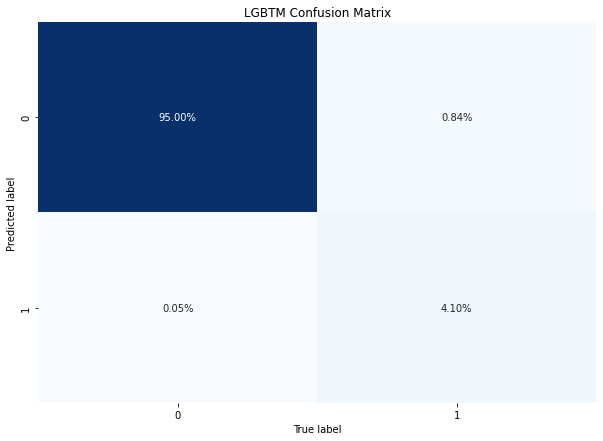

In [ ]:
conf_matrix = confusion_matrix(y_val_arri, y_predi)

def plot_conf_mat(y_val, y_pred):
  fig, ax = plt.subplots(figsize=(10,7))
  ax = sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, cbar=False, fmt='.2%', cmap='Blues')
  plt.title("LGBTM Confusion Matrix")
  plt.xlabel("True label")
  plt.ylabel("Predicted label")

plot_conf_mat(y_val, y_predi)

In [ ]:
best_model.feature_importances_

array([504, 567, 439, 419, 380, 182, 377, 147, 682, 387,  26, 176, 111,
        40,   3,  69,  55, 524, 338, 472, 294, 750, 366])

In [ ]:
def plotImp(best_model, X_train , num = 20, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value':best_model.feature_importances_,'Feature':X_train.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()

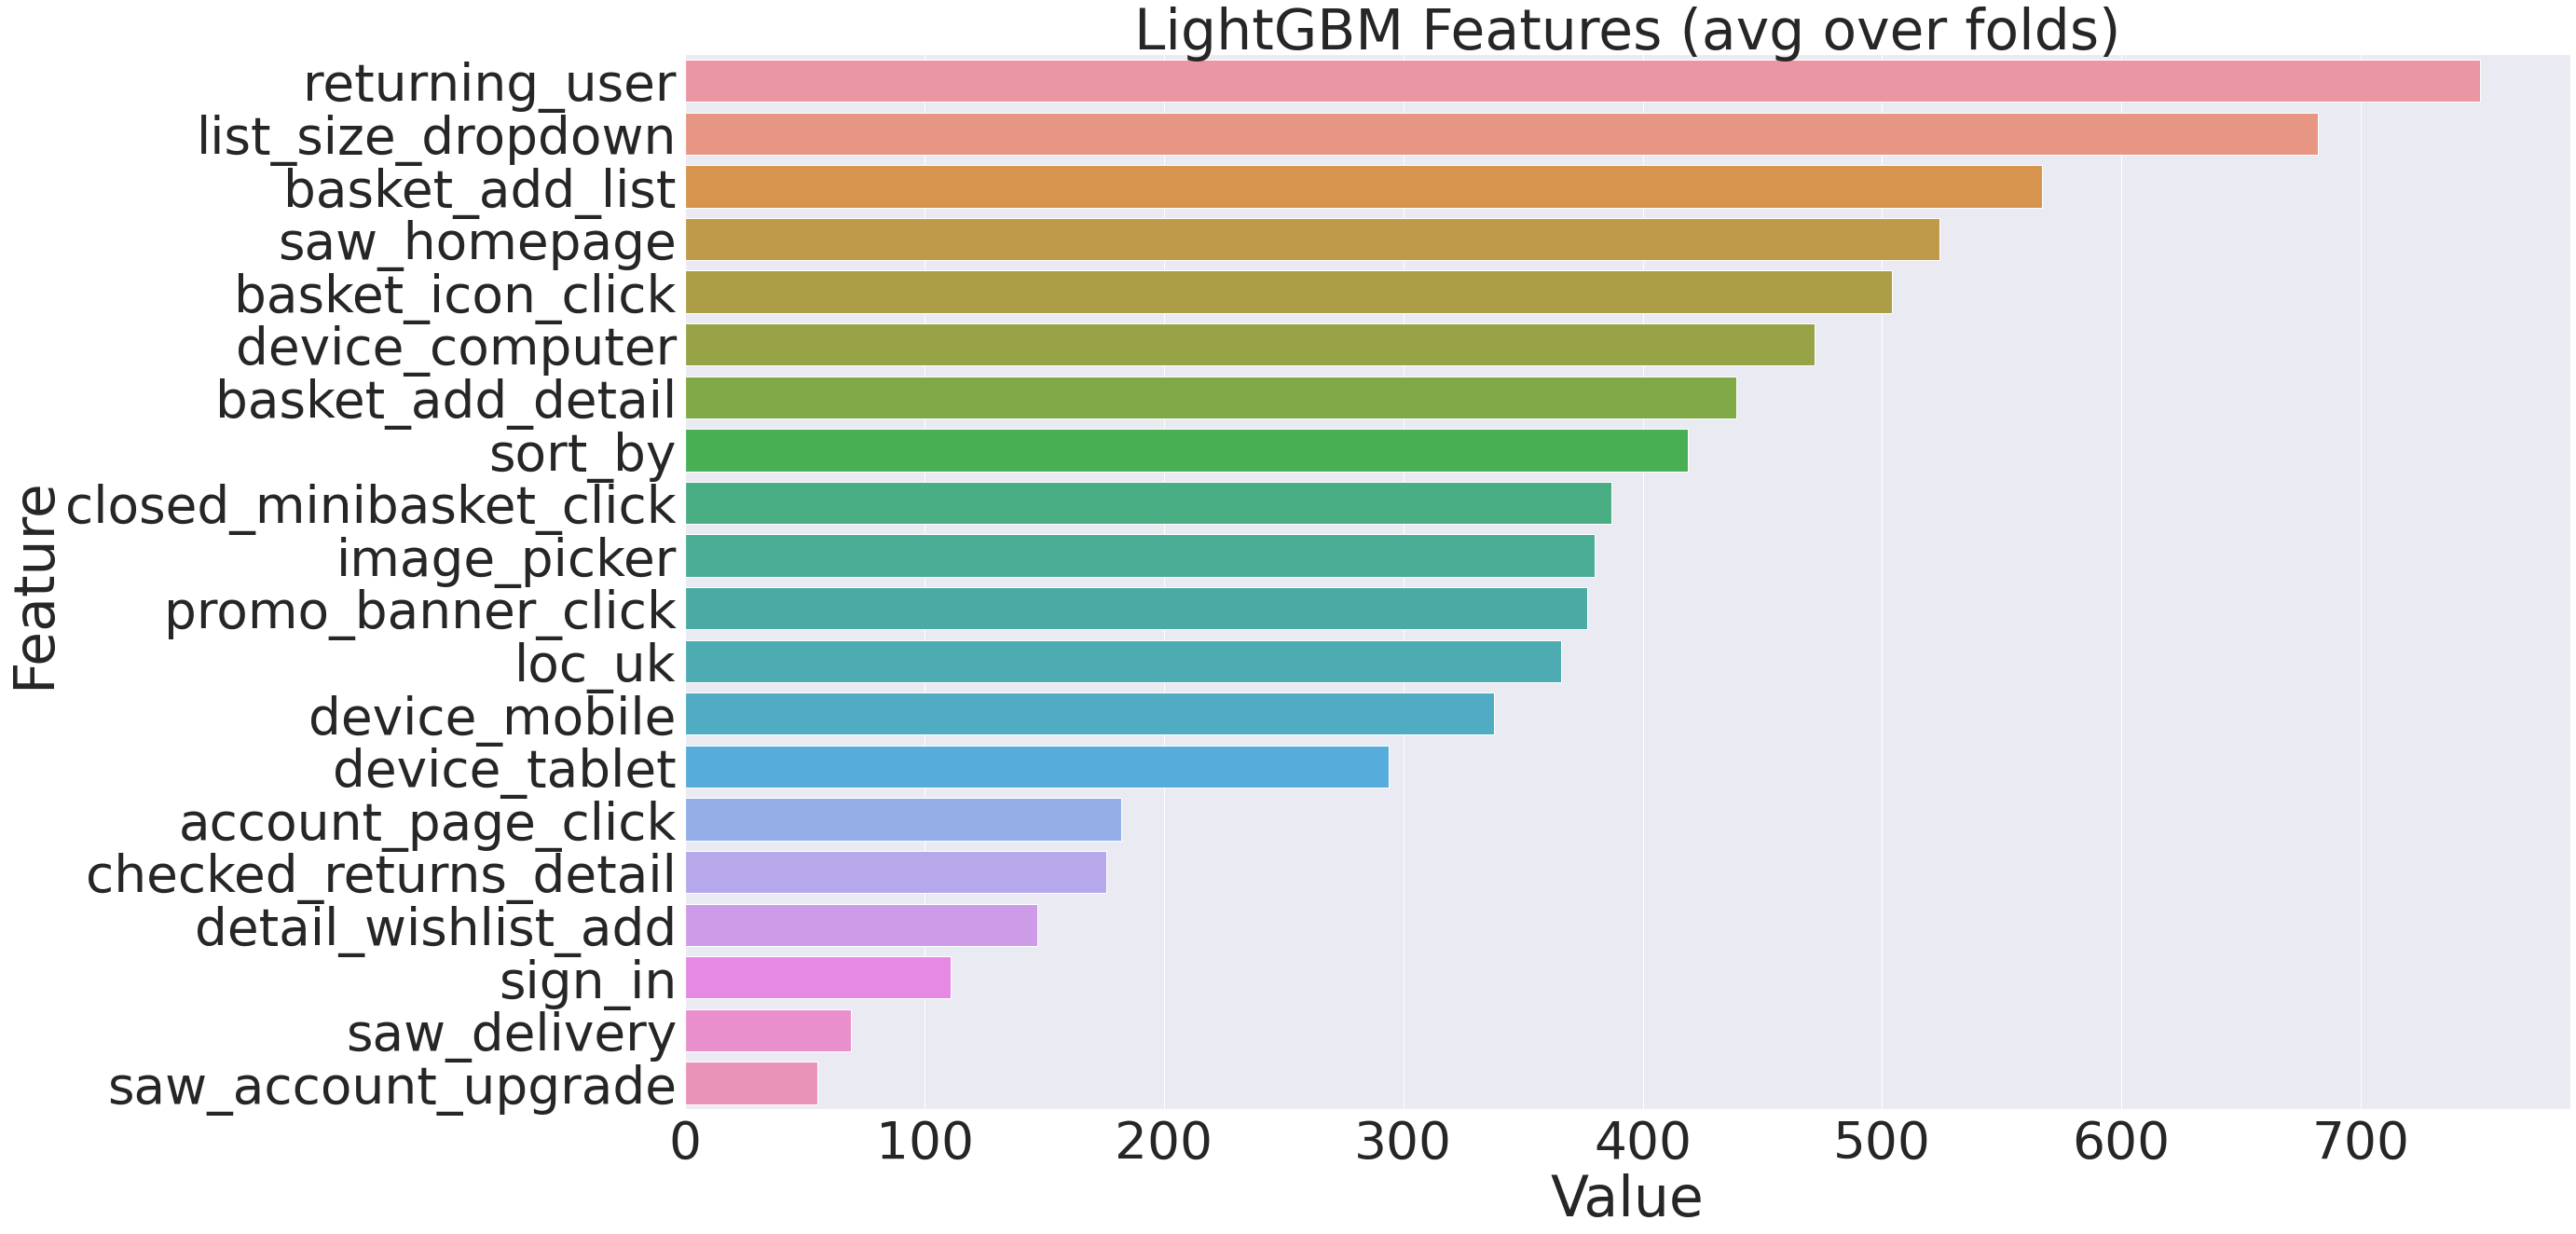

In [ ]:
plotImp(best_model, X_train)